<a href="https://colab.research.google.com/github/mojodean/aai-530-final-project/blob/vperng/530_IoT_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Google Colab compatibility
from google.colab import drive
drive.mount('/content/drive')
!pip install opendatasets

Mounted at /content/drive


In [30]:
# Import Libraries
import opendatasets as od
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

# Data Exploration

In [4]:
# Download path
download_path = '/content/drive/MyDrive/Colab Notebooks/530-IoT-Project'
os.chdir(download_path)

# # Load dataset from Kaggle
# od.download("https://www.kaggle.com/datasets/taranvee/smart-home-dataset-with-weather-information?resource=download",
#             data_dir=download_path)

In [5]:
# File path
file_path = os.path.join(download_path, "smart-home-dataset-with-weather-information/HomeC.csv")

# Load dataset into DataFrame
df = pd.read_csv(file_path, low_memory = False)

In [ ]:
# Print first 5 rows
df.head()

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26   1016.91   
1          0.006983  ...        10.0    Clear                29.26   1016.91   
2          0.006983  ...        10.0    Clear                29.26   1016.91   
3          0.006983  ...        10.0    Clear                29.26   1016.91   
4          0.006850  ...        10.0    Clear                29.26   1016.91   

   windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0       9.18  cloudCover        282.0              0.0      24.4   
1       9.18  cloudCover        282.0              0.0      24.4   
2       9.18  cloudCover        282.0              0.0      24.4   
3       9.18  cloudCover        282.0              0.0      24.4   
4       9.18  cloudCover        282.0              0.0      24.4   

   precipProbability  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 32 columns]

In [ ]:
# Print last 5 rows
df.tail()

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   
503910           \       NaN       NaN                 NaN              NaN   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   
503910             NaN             NaN               NaN          NaN   

        Wine cellar [kW]  ...  visibility     summary  apparentTemperature  \
503906          0.008433  ...        8.74  Light Rain                29.45   
503907          0.008467  ...        8.74  Light Rain                29.45   
503908          0.008233  ...        8.74  Light Rain                29.45   
503909          0.008133  ...        8.74  Light Rain                29.45   
503910               NaN  ...         NaN         NaN                  NaN   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
503906   1011.49       6.72        0.31        186.0           0.0101   
503907   1011.49       6.72        0.31        186.0           0.0101   
503908   1011.49       6.72        0.31        186.0           0.0101   
503909   1011.49       6.72        0.31        186.0           0.0101   
503910       NaN        NaN         NaN          NaN              NaN   

        dewPoint  precipProbability  
503906     31.27               0.51  
503907     31.27               0.51  
503908     31.27               0.51  
503909     31.27               0.51  
503910       NaN                NaN  

[5 rows x 32 columns]

In [ ]:
# Inspect missing values and type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

<Axes: >

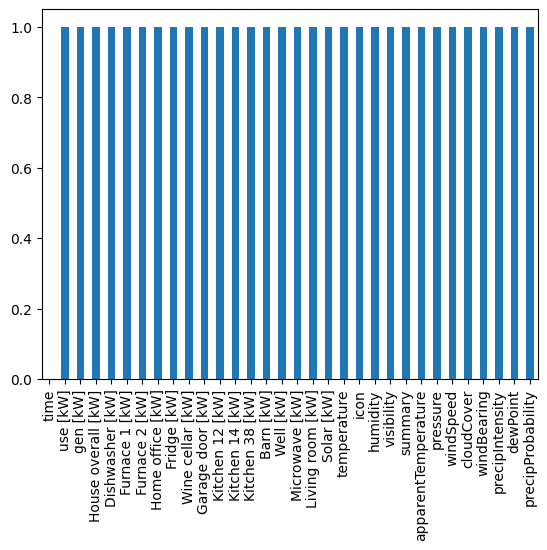

In [ ]:
# Plot missing value counts
df.isnull().sum().plot.bar()

In [6]:
# Remove missing data since it is only 1 row (last row)
df = df.dropna()

df.isnull().sum()

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [ ]:
# Summary statistics
df.describe()

use [kW]       gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  503910.000000  503910.000000       503910.000000    503910.000000   
mean        0.858962       0.076229            0.858962         0.031368   
std         1.058207       0.128428            1.058207         0.190951   
min         0.000000       0.000000            0.000000         0.000000   
25%         0.367667       0.003367            0.367667         0.000000   
50%         0.562333       0.004283            0.562333         0.000017   
75%         0.970250       0.083917            0.970250         0.000233   
max        14.714567       0.613883           14.714567         1.401767   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]    Fridge [kW]  \
count   503910.000000   503910.000000     503910.000000  503910.000000   
mean         0.099210        0.136779          0.081287       0.063556   
std          0.169059        0.178631          0.104466       0.076199   
min          0.000017        0.000067          0.000083       0.000067   
25%          0.020233        0.064400          0.040383       0.005083   
50%          0.020617        0.066633          0.042217       0.005433   
75%          0.068733        0.080633          0.068283       0.125417   
max          1.934083        0.794933          0.971750       0.851267   

       Wine cellar [kW]  Garage door [kW]  ...    temperature       humidity  \
count     503910.000000     503910.000000  ...  503910.000000  503910.000000   
mean           0.042137          0.014139  ...      50.741935       0.664085   
std            0.057967          0.014292  ...      19.113807       0.194389   
min            0.000017          0.000017  ...     -12.640000       0.130000   
25%            0.007133          0.012733  ...      35.770000       0.510000   
50%            0.008083          0.012933  ...      50.320000       0.680000   
75%            0.053192          0.013100  ...      66.260000       0.840000   
max            1.273933          1.088983  ...      93.720000       0.980000   

          visibility  apparentTemperature       pressure      windSpeed  \
count  503910.000000        503910.000000  503910.000000  503910.000000   
mean        9.253444            48.263382    1016.301625       6.649936   
std         1.611186            22.027916       7.895185       3.982716   
min         0.270000           -32.080000     986.400000       0.000000   
25%         9.420000            31.090000    1011.290000       3.660000   
50%        10.000000            50.320000    1016.530000       5.930000   
75%        10.000000            66.260000    1021.480000       8.940000   
max        10.000000           101.120000    1042.460000      22.910000   

         windBearing  precipIntensity       dewPoint  precipProbability  
count  503910.000000    503910.000000  503910.000000      503910.000000  
mean      202.356843         0.002598      38.694013           0.056453  
std       106.520474         0.011257      19.087939           0.165836  
min         0.000000         0.000000     -27.240000           0.000000  
25%       148.000000         0.000000      24.600000           0.000000  
50%       208.000000         0.000000      39.030000           0.000000  
75%       295.000000         0.000000      54.790000           0.000000  
max       359.000000         0.191000      75.490000           0.840000  

[8 rows x 28 columns]

In [7]:
# Convert UNIX time to datetime
df['datetime'] = pd.to_datetime(df['time'], unit='s')
df['datetime'].head()

<ipython-input-7-829b5d54a1ba>:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['datetime'] = pd.to_datetime(df['time'], unit='s')


0   2016-01-01 05:00:00
1   2016-01-01 05:00:01
2   2016-01-01 05:00:02
3   2016-01-01 05:00:03
4   2016-01-01 05:00:04
Name: datetime, dtype: datetime64[ns]

In [8]:
# Dataset creator mentioned that the timesteps are meant to be per min instead of sec
# Convert to 1 minute intervals
df['datetime'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00',
                                                periods=len(df),
                                                freq='min'))
df['datetime'].head(5)

0   2016-01-01 05:00:00
1   2016-01-01 05:01:00
2   2016-01-01 05:02:00
3   2016-01-01 05:03:00
4   2016-01-01 05:04:00
Name: datetime, dtype: datetime64[ns]

In [ ]:
df['datetime'].describe()

count                           503910
mean     2016-06-24 04:14:30.000001280
min                2016-01-01 05:00:00
25%                2016-03-28 16:37:15
50%                2016-06-24 04:14:30
75%                2016-09-19 15:51:45
max                2016-12-16 03:29:00
Name: datetime, dtype: object

In [ ]:
# Columns of interest
home_apps = ['Dishwasher [kW]',
             'Furnace 1 [kW]',
             'Furnace 2 [kW]',
             'Home office [kW]',
             'Fridge [kW]',
             'Wine cellar [kW]',
             'Garage door [kW]',
             'Kitchen 12 [kW]',
             'Kitchen 14 [kW]',
             'Kitchen 38 [kW]',
             'Barn [kW]',
             'Well [kW]',
             'Microwave [kW]',
             'Living room [kW]',
             'Solar [kW]',
             'House overall [kW]',
             'temperature']

<ipython-input-31-7754217eea85>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.groupby(pd.Grouper(key='datetime', freq='M'))[home_apps].mean()


Text(0.5, 0.9, 'Monthly Averages for Home Applications')

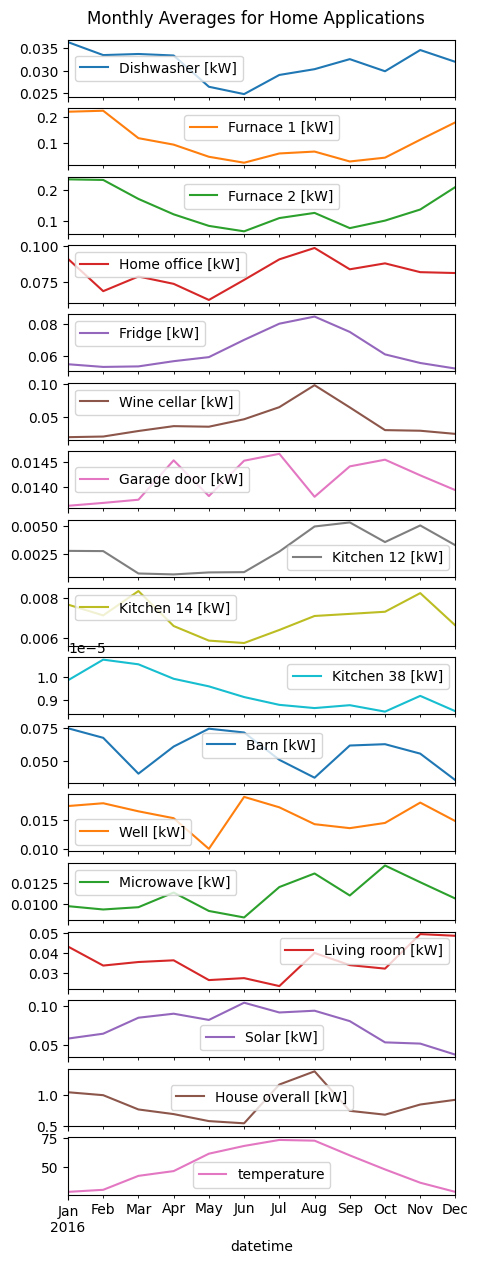

In [ ]:
# Create line plots using monthly average of each feature
monthly_avg = df.groupby(pd.Grouper(key='datetime', freq='M'))[home_apps].mean()
monthly_avg.plot(y=home_apps, subplots=True, figsize=(5,15))
plt.suptitle("Monthly Averages for Home Applications", y=0.9)



In [ ]:
monthly_avg.head()

Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
datetime                                                                        
2016-01-31         0.036391        0.221591        0.235614          0.091203   
2016-02-29         0.033503        0.225371        0.233713          0.068263   
2016-03-31         0.033748        0.120040        0.172221          0.078668   
2016-04-30         0.033412        0.095146        0.122305          0.073455   
2016-05-31         0.026452        0.048578        0.084887          0.062029   

            Fridge [kW]  Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  \
datetime                                                                       
2016-01-31     0.054945          0.018962          0.013646         0.002758   
2016-02-29     0.053283          0.019935          0.013701         0.002737   
2016-03-31     0.053609          0.028416          0.013763         0.000697   
2016-04-30     0.056828          0.035844          0.014524         0.000615   
2016-05-31     0.059334          0.034979          0.013834         0.000795   

            Kitchen 14 [kW]  Kitchen 38 [kW]  Barn [kW]  Well [kW]  \
datetime                                                             
2016-01-31         0.007653         0.000010   0.074741   0.017278   
2016-02-29         0.007114         0.000011   0.067462   0.017746   
2016-03-31         0.008329         0.000011   0.040141   0.016394   
2016-04-30         0.006584         0.000010   0.060805   0.015240   
2016-05-31         0.005856         0.000010   0.074412   0.010102   

            Microwave [kW]  Living room [kW]  Solar [kW]  House overall [kW]  \
datetime                                                                       
2016-01-31        0.009687          0.043328    0.058560            1.043215   
2016-02-29        0.009292          0.033737    0.064756            0.995164   
2016-03-31        0.009563          0.035528    0.085032            0.762251   
2016-04-30        0.011308          0.036382    0.090128            0.686640   
2016-05-31        0.009116          0.026413    0.082229            0.572376   

            temperature  
datetime                 
2016-01-31    28.721361  
2016-02-29    30.472338  
2016-03-31    42.423383  
2016-04-30    46.511224  
2016-05-31    61.404635

Text(0.5, 0.9, '30-Day Moving Averages for Home Applications')

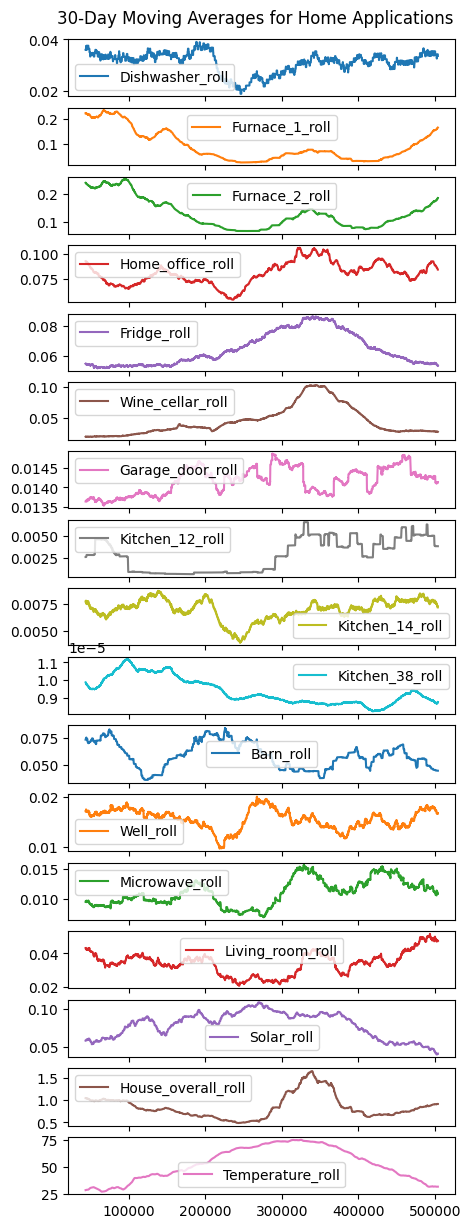

In [ ]:
# Create line plots of 30-day moving average
columns_rolling = ['Dishwasher_roll',
                   'Furnace_1_roll',
                   'Furnace_2_roll',
                   'Home_office_roll',
                   'Fridge_roll',
                   'Wine_cellar_roll',
                   'Garage_door_roll',
                   'Kitchen_12_roll',
                   'Kitchen_14_roll',
                   'Kitchen_38_roll',
                   'Barn_roll',
                   'Well_roll',
                   'Microwave_roll',
                   'Living_room_roll',
                   'Solar_roll',
                   'House_overall_roll',
                   'Temperature_roll'
                   ]

df[columns_rolling] = df[home_apps].rolling(43200).mean()
df.plot(y=columns_rolling, subplots=True, figsize=(5,15))
plt.suptitle("30-Day Moving Averages for Home Applications", y=0.9)

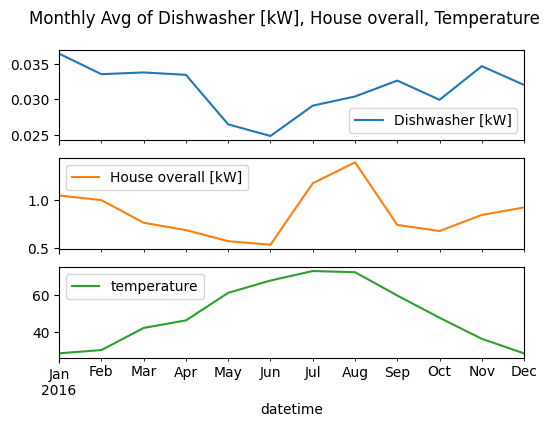

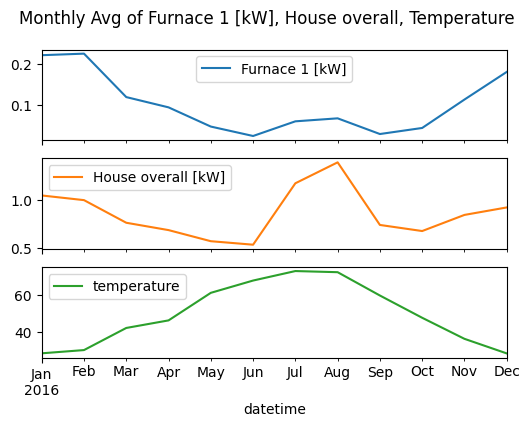

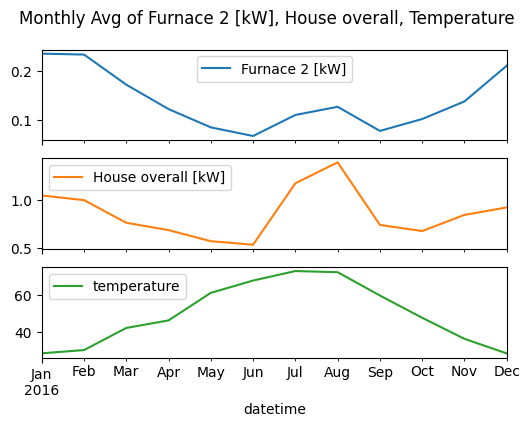

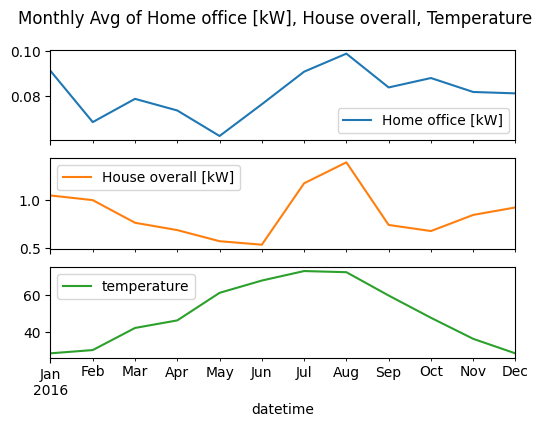

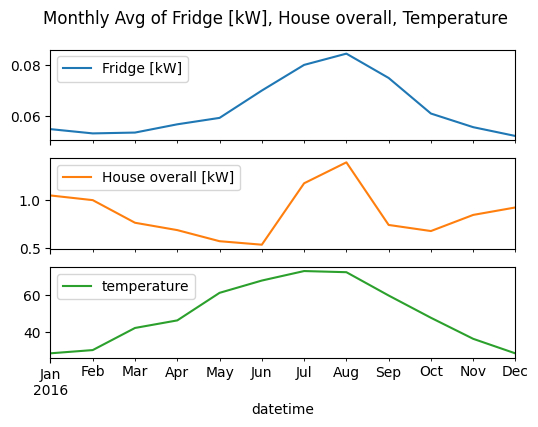

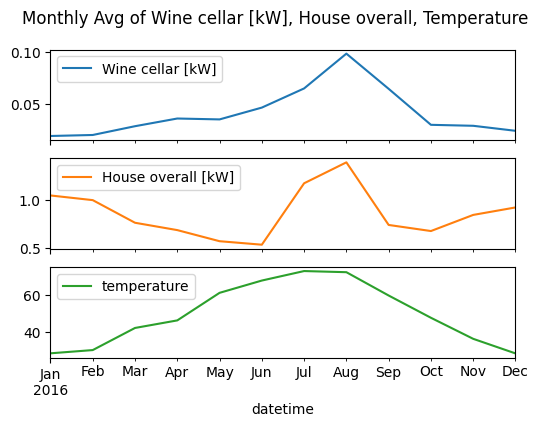

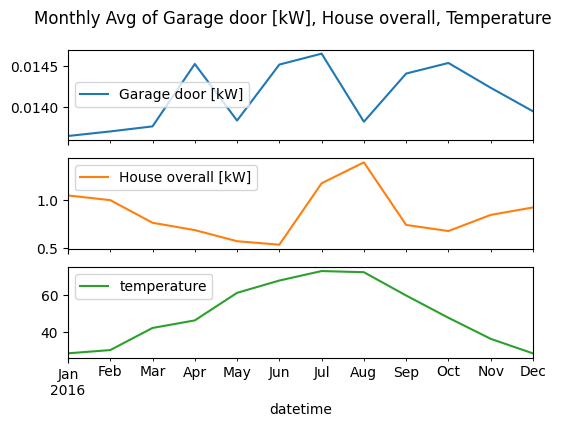

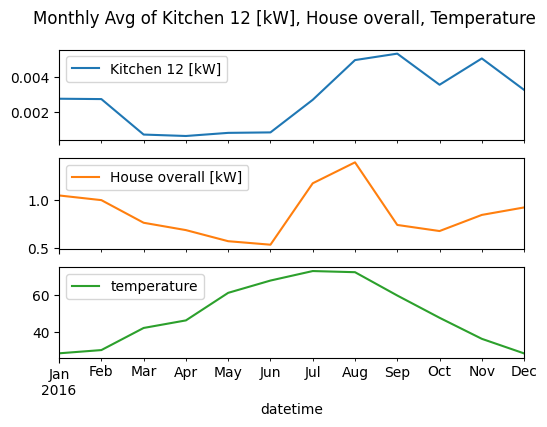

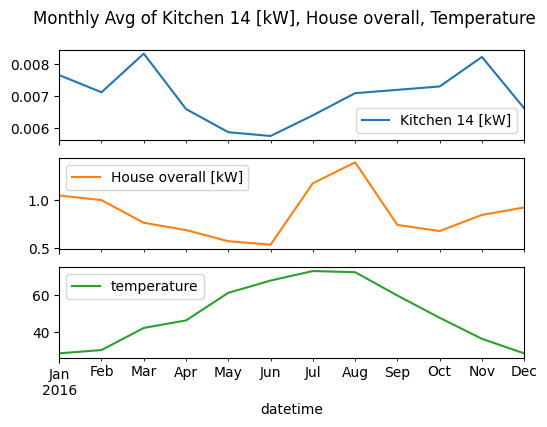

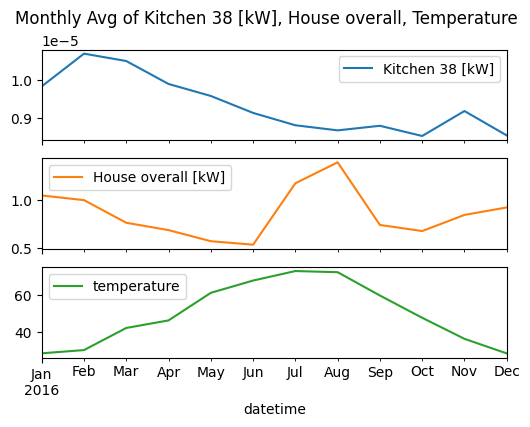

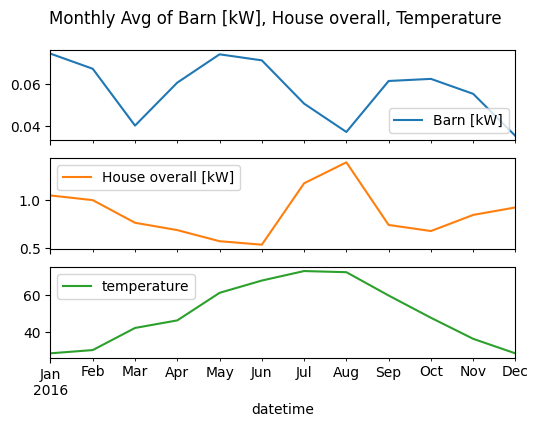

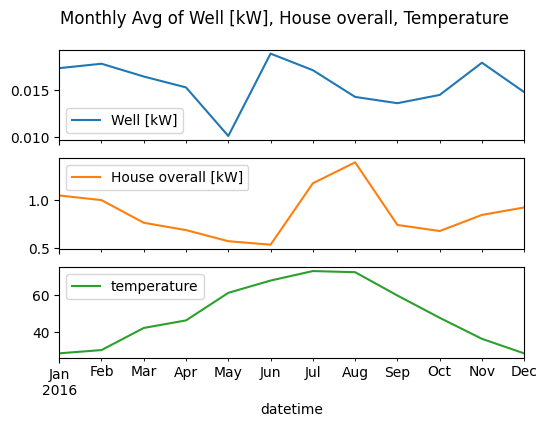

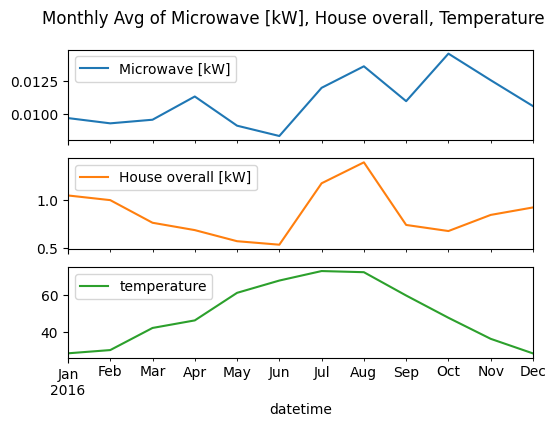

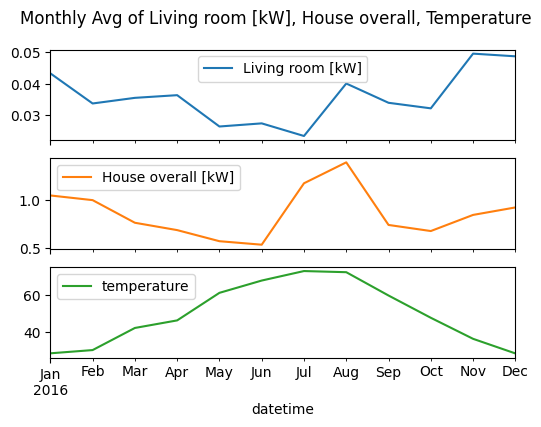

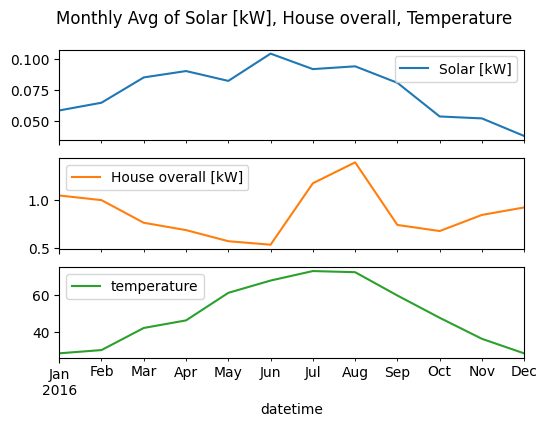

In [ ]:
for col in home_apps[:-2]:
    monthly_avg.plot(y=[col, 'House overall [kW]','temperature'],
                     subplots=True,
                     figsize=(6,4))
    plt.suptitle(f"Monthly Avg of {col}, House overall, Temperature")

In [ ]:
# Continuous features
cont_feat = ['Dishwasher [kW]',
             'Furnace 1 [kW]',
             'Furnace 2 [kW]',
             'Home office [kW]',
             'Fridge [kW]',
             'Wine cellar [kW]',
             'Garage door [kW]',
             'Kitchen 12 [kW]',
             'Kitchen 14 [kW]',
             'Kitchen 38 [kW]',
             'Barn [kW]',
             'Well [kW]',
             'Microwave [kW]',
             'Living room [kW]',
             'Solar [kW]',
             'temperature',
             'humidity',
             'visibility',
             'apparentTemperature',
             'pressure',
             'windSpeed',
             'windBearing',
             'precipIntensity',
             'dewPoint',
             'precipProbability',
             'House overall [kW]',
             ]


Text(0.5, 1.0, 'Correlation Matrix between Continuous Features')

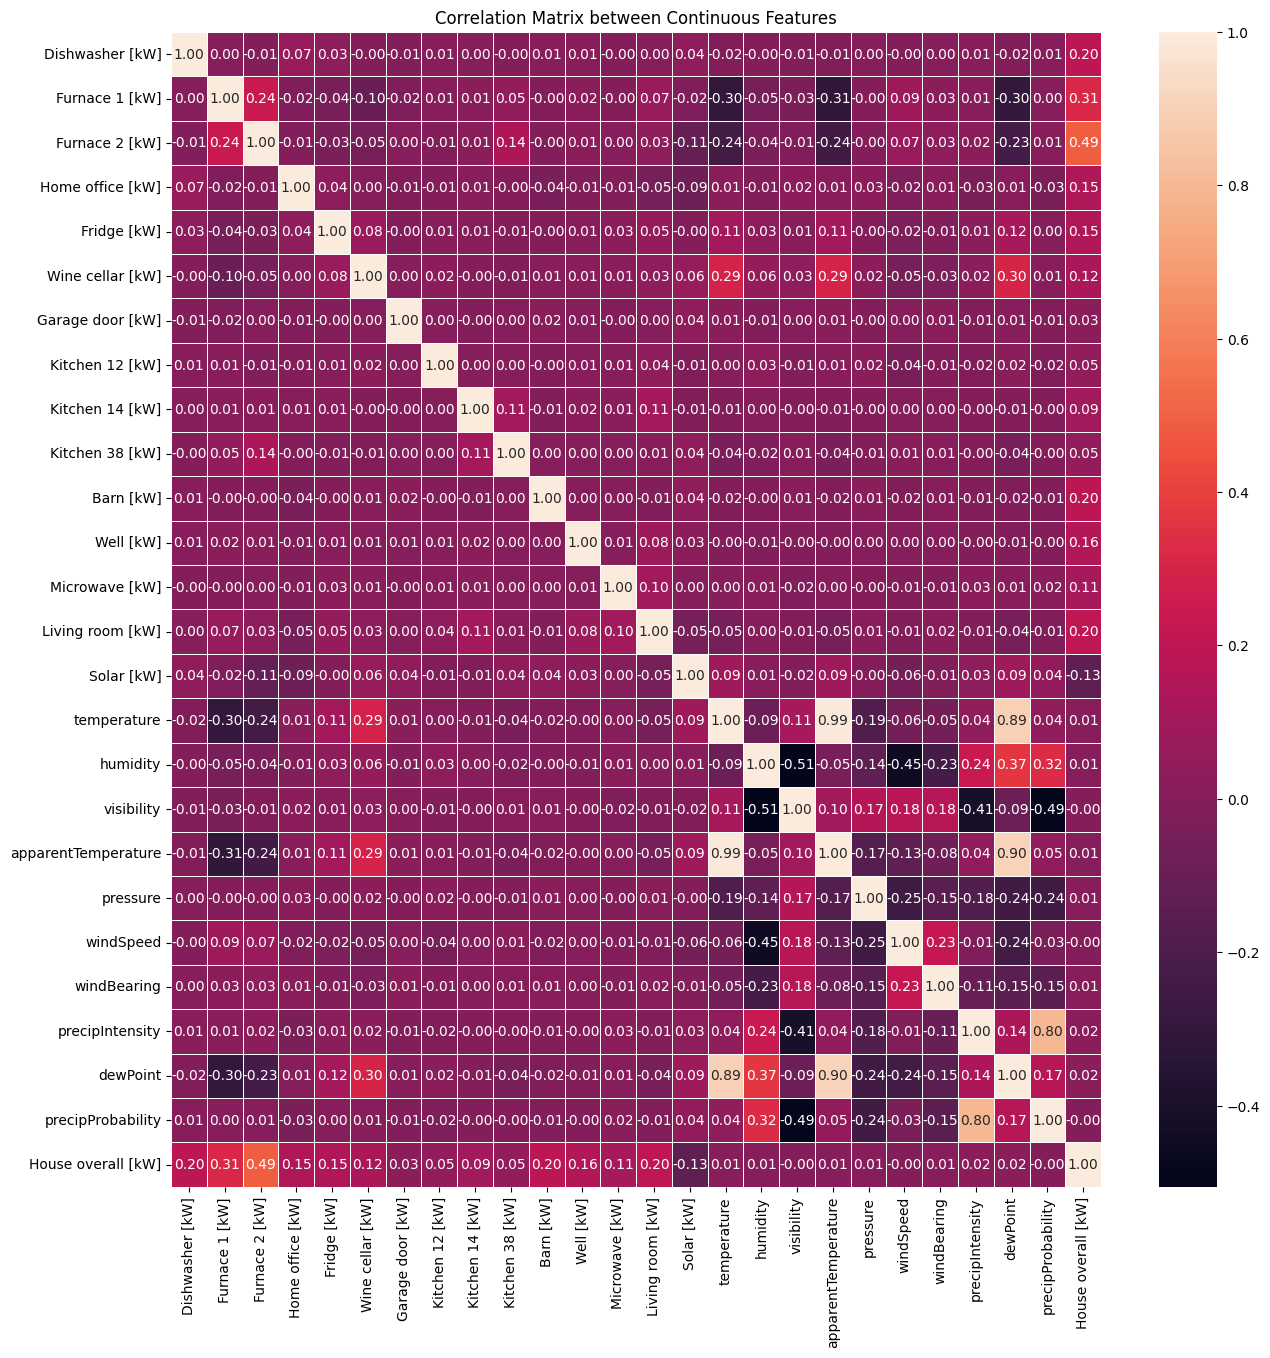

In [ ]:
correlation_matrix = df[cont_feat].corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Continuous Features')


# Data Preprocessing - AutoEncoder

In [9]:
# Make copy of dataframe with features selected
selected_features = ['datetime',
                     'House overall [kW]',
                     'Furnace 1 [kW]',
                     'Furnace 2 [kW]',
                     'Home office [kW]',
                     'Fridge [kW]',
                     'Wine cellar [kW]',
                     'Living room [kW]',
                     'temperature'
]

df_work = df[selected_features].copy()
df_work.head()

datetime  House overall [kW]  Furnace 1 [kW]  Furnace 2 [kW]  \
0 2016-01-01 05:00:00            0.932833        0.020700        0.061917   
1 2016-01-01 05:01:00            0.934333        0.020717        0.063817   
2 2016-01-01 05:02:00            0.931817        0.020700        0.062317   
3 2016-01-01 05:03:00            1.022050        0.106900        0.068517   
4 2016-01-01 05:04:00            1.139400        0.236933        0.063983   

   Home office [kW]  Fridge [kW]  Wine cellar [kW]  Living room [kW]  \
0          0.442633     0.124150          0.006983          0.001517   
1          0.444067     0.124000          0.006983          0.001650   
2          0.446067     0.123533          0.006983          0.001650   
3          0.446583     0.123133          0.006983          0.001617   
4          0.446533     0.122850          0.006850          0.001583   

   temperature  
0        36.14  
1        36.14  
2        36.14  
3        36.14  
4        36.14

In [10]:
# Extract useful features from datetime
df_work['hour'] = df['datetime'].dt.hour
df_work['day_of_week'] = df['datetime'].dt.dayofweek
df_work['month'] = df['datetime'].dt.month


In [11]:
# Combine Furnace 1 and Furnace 2 to one feature
df_work['Total Furnace'] = df_work['Furnace 1 [kW]'] + df_work['Furnace 2 [kW]']

In [12]:
# List of features for energy consumption
energy_features = [
    'House overall [kW]',
    'Total Furnace',
    'Home office [kW]',
    'Fridge [kW]',
    'Wine cellar [kW]',
    'Living room [kW]',
]

In [13]:
# Feature Engineering - 1 hr rolling statistics for energy consumption data
rolling_window = 60
for col in energy_features:
  df_work[f'rolling_mean_{col}'] = df_work[col].rolling(rolling_window).mean()
  df_work[f'rolling_std_{col}'] = df_work[col].rolling(rolling_window).std()


In [14]:
# Feature Engineering - Appliance-to-total ratios
appliances = [
    'Total Furnace',
    'Home office [kW]',
    'Fridge [kW]',
    'Wine cellar [kW]',
    'Living room [kW]',
]

# Set a minimum threshold so that ratio does not go to infinity
threshold = 0.01
df_work['House_w_threshold'] = df_work['House overall [kW]'].apply(lambda x: max(x, threshold))

# Calculate ratio of appliance energy consumption to house overall consumption
for app in appliances:
  df_work[f'{app}_ratio'] = df_work[app] / df_work['House_w_threshold']


In [15]:
df_work.head()

datetime  House overall [kW]  Furnace 1 [kW]  Furnace 2 [kW]  \
0 2016-01-01 05:00:00            0.932833        0.020700        0.061917   
1 2016-01-01 05:01:00            0.934333        0.020717        0.063817   
2 2016-01-01 05:02:00            0.931817        0.020700        0.062317   
3 2016-01-01 05:03:00            1.022050        0.106900        0.068517   
4 2016-01-01 05:04:00            1.139400        0.236933        0.063983   

   Home office [kW]  Fridge [kW]  Wine cellar [kW]  Living room [kW]  \
0          0.442633     0.124150          0.006983          0.001517   
1          0.444067     0.124000          0.006983          0.001650   
2          0.446067     0.123533          0.006983          0.001650   
3          0.446583     0.123133          0.006983          0.001617   
4          0.446533     0.122850          0.006850          0.001583   

   temperature  hour  ...  rolling_mean_Wine cellar [kW]  \
0        36.14     5  ...                            NaN   
1        36.14     5  ...                            NaN   
2        36.14     5  ...                            NaN   
3        36.14     5  ...                            NaN   
4        36.14     5  ...                            NaN   

   rolling_std_Wine cellar [kW]  rolling_mean_Living room [kW]  \
0                           NaN                            NaN   
1                           NaN                            NaN   
2                           NaN                            NaN   
3                           NaN                            NaN   
4                           NaN                            NaN   

   rolling_std_Living room [kW]  House_w_threshold  Total Furnace_ratio  \
0                           NaN           0.932833             0.088565   
1                           NaN           0.934333             0.090474   
2                           NaN           0.931817             0.089091   
3                           NaN           1.022050             0.171632   
4                           NaN           1.139400             0.264101   

   Home office [kW]_ratio  Fridge [kW]_ratio  Wine cellar [kW]_ratio  \
0                0.474504           0.133089                0.007486   
1                0.475276           0.132715                0.007474   
2                0.478706           0.132573                0.007494   
3                0.436949           0.120477                0.006833   
4                0.391902           0.107820                0.006012   

   Living room [kW]_ratio  
0                0.001626  
1                0.001766  
2                0.001771  
3                0.001582  
4                0.001390  

[5 rows x 31 columns]

In [16]:
df_work.describe()

datetime  House overall [kW]  Furnace 1 [kW]  \
count                         503910       503910.000000   503910.000000   
mean   2016-06-24 04:14:30.000001280            0.858962        0.099210   
min              2016-01-01 05:00:00            0.000000        0.000017   
25%              2016-03-28 16:37:15            0.367667        0.020233   
50%              2016-06-24 04:14:30            0.562333        0.020617   
75%              2016-09-19 15:51:45            0.970250        0.068733   
max              2016-12-16 03:29:00           14.714567        1.934083   
std                              NaN            1.058207        0.169059   

       Furnace 2 [kW]  Home office [kW]    Fridge [kW]  Wine cellar [kW]  \
count   503910.000000     503910.000000  503910.000000     503910.000000   
mean         0.136779          0.081287       0.063556          0.042137   
min          0.000067          0.000083       0.000067          0.000017   
25%          0.064400          0.040383       0.005083          0.007133   
50%          0.066633          0.042217       0.005433          0.008083   
75%          0.080633          0.068283       0.125417          0.053192   
max          0.794933          0.971750       0.851267          1.273933   
std          0.178631          0.104466       0.076199          0.057967   

       Living room [kW]    temperature           hour  ...  \
count     503910.000000  503910.000000  503910.000000  ...   
mean           0.035313      50.741935      11.501399  ...   
min            0.000000     -12.640000       0.000000  ...   
25%            0.001483      35.770000       6.000000  ...   
50%            0.001617      50.320000      12.000000  ...   
75%            0.001750      66.260000      18.000000  ...   
max            0.465217      93.720000      23.000000  ...   
std            0.096056      19.113807       6.922017  ...   

       rolling_mean_Wine cellar [kW]  rolling_std_Wine cellar [kW]  \
count                  503851.000000                 503851.000000   
mean                        0.042139                      0.018928   
min                         0.000017                      0.000000   
25%                         0.007321                      0.000171   
50%                         0.014844                      0.000621   
75%                         0.074324                      0.047320   
max                         1.120965                      0.544799   
std                         0.047552                      0.027560   

       rolling_mean_Living room [kW]  rolling_std_Living room [kW]  \
count                  503851.000000                 503851.000000   
mean                        0.035313                      0.020197   
min                         0.000000                      0.000000   
25%                         0.001512                      0.000069   
50%                         0.001632                      0.000100   
75%                         0.001930                      0.000267   
max                         0.377364                      0.196730   
std                         0.080749                      0.048419   

       House_w_threshold  Total Furnace_ratio  Home office [kW]_ratio  \
count      503910.000000        503910.000000           503910.000000   
mean            0.858986             0.444025                0.205007   
min             0.010000             0.007288                0.002724   
25%             0.367667             0.151881                0.054756   
50%             0.562333             0.245930                0.093815   
75%             0.970250             0.471265                0.162905   
max            14.714567            27.968333               16.913333   
std             1.058188             0.924810                0.536464   

       Fridge [kW]_ratio  Wine cellar [kW]_ratio  Living room [kW]_ratio  
count      503910.000000           503910.000000           503910.000000  
mean            0.136540     

In [17]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503910 entries, 0 to 503909
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   datetime                         503910 non-null  datetime64[ns]
 1   House overall [kW]               503910 non-null  float64       
 2   Furnace 1 [kW]                   503910 non-null  float64       
 3   Furnace 2 [kW]                   503910 non-null  float64       
 4   Home office [kW]                 503910 non-null  float64       
 5   Fridge [kW]                      503910 non-null  float64       
 6   Wine cellar [kW]                 503910 non-null  float64       
 7   Living room [kW]                 503910 non-null  float64       
 8   temperature                      503910 non-null  float64       
 9   hour                             503910 non-null  int32         
 10  day_of_week                      503910 non-null 

In [18]:
# Remove missing 59 data from creating rolling statistics
df_work = df_work.dropna()

df_work.isnull().sum()

datetime                           0
House overall [kW]                 0
Furnace 1 [kW]                     0
Furnace 2 [kW]                     0
Home office [kW]                   0
Fridge [kW]                        0
Wine cellar [kW]                   0
Living room [kW]                   0
temperature                        0
hour                               0
day_of_week                        0
month                              0
Total Furnace                      0
rolling_mean_House overall [kW]    0
rolling_std_House overall [kW]     0
rolling_mean_Total Furnace         0
rolling_std_Total Furnace          0
rolling_mean_Home office [kW]      0
rolling_std_Home office [kW]       0
rolling_mean_Fridge [kW]           0
rolling_std_Fridge [kW]            0
rolling_mean_Wine cellar [kW]      0
rolling_std_Wine cellar [kW]       0
rolling_mean_Living room [kW]      0
rolling_std_Living room [kW]       0
House_w_threshold                  0
Total Furnace_ratio                0
Home office [kW]_ratio             0
Fridge [kW]_ratio                  0
Wine cellar [kW]_ratio             0
Living room [kW]_ratio             0
dtype: int64

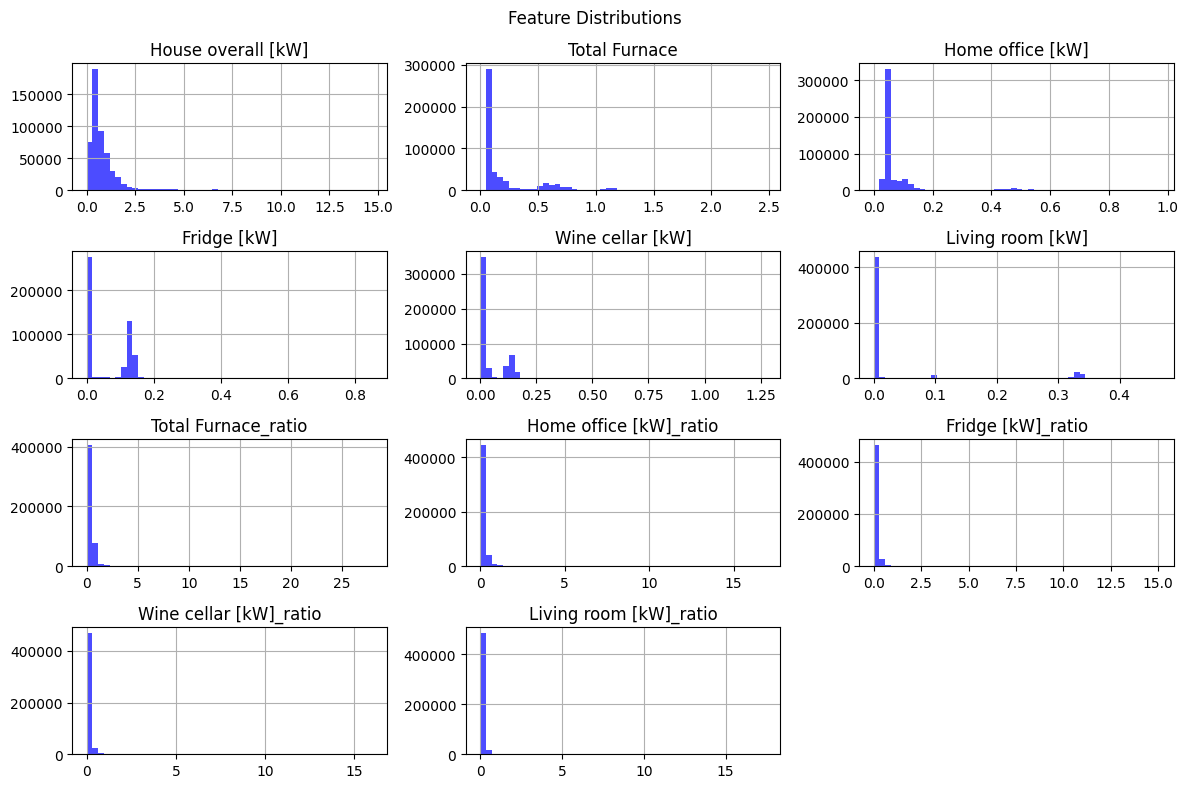

In [ ]:
# Numerical columns
features_to_check = [
    'House overall [kW]',
    'Total Furnace',
    'Home office [kW]',
    'Fridge [kW]',
    'Wine cellar [kW]',
    'Living room [kW]',
    'Total Furnace_ratio',
    'Home office [kW]_ratio',
    'Fridge [kW]_ratio',
    'Wine cellar [kW]_ratio',
    'Living room [kW]_ratio'
]

# Plot histograms
df_work[features_to_check].hist(figsize=(12, 8), bins=50, color='blue', alpha=0.7)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()


In [19]:
# List of final features
exclude = ['datetime', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'House_w_threshold']
final_features = [col for col in df_work.columns if col not in exclude]
print(final_features)

['House overall [kW]', 'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]', 'Living room [kW]', 'temperature', 'hour', 'day_of_week', 'month', 'Total Furnace', 'rolling_mean_House overall [kW]', 'rolling_std_House overall [kW]', 'rolling_mean_Total Furnace', 'rolling_std_Total Furnace', 'rolling_mean_Home office [kW]', 'rolling_std_Home office [kW]', 'rolling_mean_Fridge [kW]', 'rolling_std_Fridge [kW]', 'rolling_mean_Wine cellar [kW]', 'rolling_std_Wine cellar [kW]', 'rolling_mean_Living room [kW]', 'rolling_std_Living room [kW]', 'Total Furnace_ratio', 'Home office [kW]_ratio', 'Fridge [kW]_ratio', 'Wine cellar [kW]_ratio', 'Living room [kW]_ratio']


In [26]:
# Define split point for 70-30 train/test split
split_point = int(len(df_work) * 0.7)

# Split data
X_train_raw = df_work[final_features].iloc[:split_point] # First 70% of the data
X_test_raw = df_work[final_features].iloc[split_point:] # Last 30% of the data

# Create validation set from test set
split_point_val = int(len(X_test_raw) * 0.5)
X_val_raw = X_test_raw.iloc[:split_point_val] # First 50% of test set
X_test_raw = X_test_raw.iloc[split_point_val:] # Second 50% of test set

# Print shapes of each set
print(f'Training data shape: {X_train_raw.shape}')
print(f'Validation data shape: {X_val_raw.shape}')
print(f'Testing data shape: {X_test_raw.shape}')

Training data shape: (352695, 27)
Validation data shape: (75578, 27)
Testing data shape: (75578, 27)


In [28]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale on training data
scaler.fit(X_train_raw)

# Fit and transform the data
X_train = scaler.transform(X_train_raw)
X_val = scaler.transform(X_val_raw)
X_test = scaler.transform(X_test_raw)

# Model Training - Autoencoder

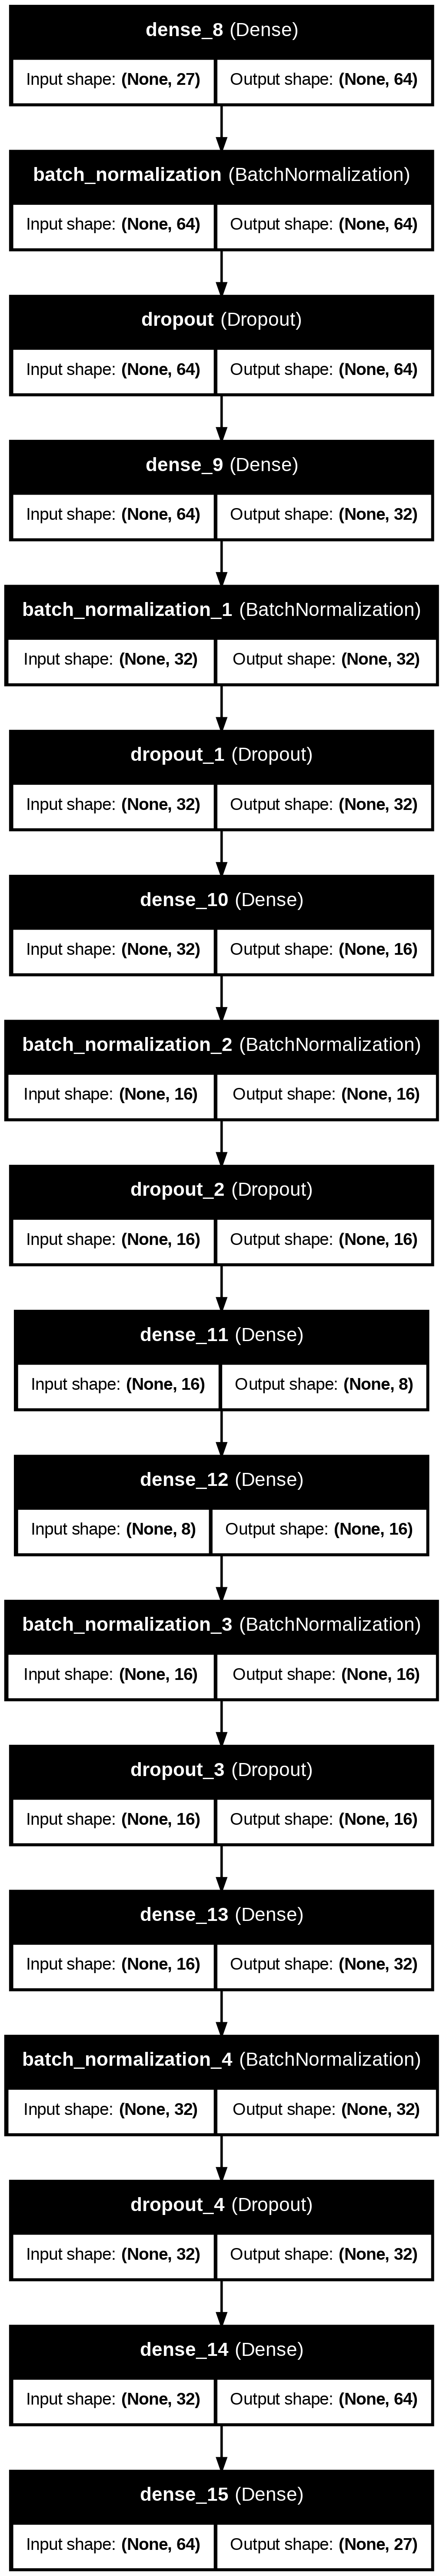

In [31]:
# Get input shape based on number of features
input_shape = X_train.shape[1]

# Autoencoder Model
autoencoder = Sequential([
    Input(shape=(input_shape,)),

    # Encoder layers
    Dense(64, activation = 'relu', kernel_regularizer = l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation = 'relu', kernel_regularizer = l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation = 'relu', kernel_regularizer = l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(8, activation = 'relu', kernel_regularizer = l2(0.001)),

    # Decoder layers
    Dense(16, activation = 'relu', kernel_regularizer = l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation = 'relu', kernel_regularizer = l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation = 'relu', kernel_regularizer = l2(0.001)),

    Dense(input_shape, activation = 'linear')
])

# Show model architecture
plot_model(autoencoder, show_shapes = True, show_layer_names = True)

In [32]:
# Early stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.5,
    patience = 3,
    min_lr = 1e-6
)

# Model checkpoints
checkpoint_filepath = ('/content/drive/MyDrive/Colab Notebooks/'
                      '530-IoT-Project/checkpoints/ckpt_{epoch:02d}.keras')
checkpoints = ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = False,
    monitor = 'val_loss',
    mode = 'min',
    save_best_only = True
)

In [33]:
# Compile the model
autoencoder.compile(optimizer = 'adam', loss = 'mse')

history = autoencoder.fit(
    X_train,
    X_train,
    epochs = 100,
    batch_size = 64,
    shuffle = False,
    validation_data = (X_val, X_val),
    callbacks = [early_stopping, lr_scheduler, checkpoints]
)

Epoch 1/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 0.8496 - val_loss: 0.7774 - learning_rate: 0.0010
Epoch 2/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.7154 - val_loss: 0.7591 - learning_rate: 0.0010
Epoch 3/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.6881 - val_loss: 0.7541 - learning_rate: 0.0010
Epoch 4/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.6705 - val_loss: 0.7785 - learning_rate: 0.0010
Epoch 5/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.6449 - val_loss: 0.7663 - learning_rate: 0.0010
Epoch 6/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.6208 - val_loss: 0.7295 - learning_rate: 0.0010
Epoch 7/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.6189 - val_loss: 0.6817 - learning_rate: 0.0010
Epoch 8/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.6128 - val_loss: 0.7246 - learning_rate: 0.0010
Epoch 9/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.5926 - val_loss: 0.657

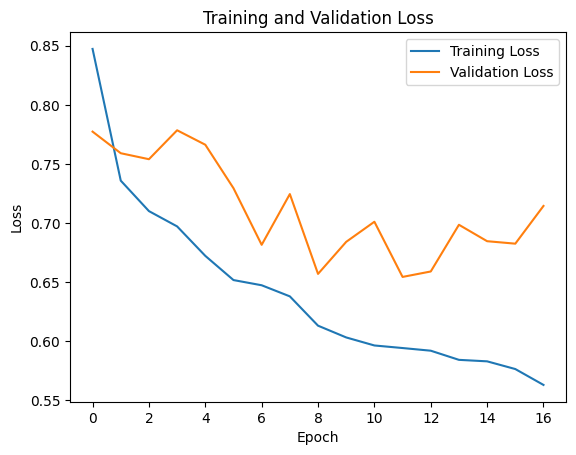

In [34]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save the model
autoencoder.save('autoencoder_model.keras')

# Model Evaluation - Autoencoder

2362/2362 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
       reconstruction_error
count          75578.000000
mean               0.902451
std                0.961671
min                0.219475
25%                0.543709
50%                0.729475
75%                1.018592
max               27.795256


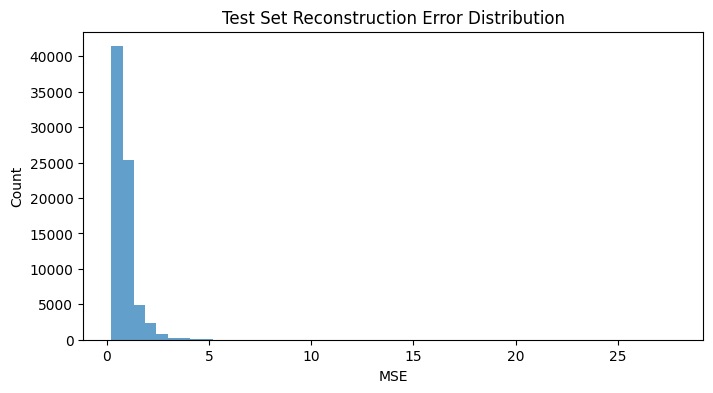

In [35]:
# Predict the reconstruction
X_test_pred = autoencoder.predict(X_test)

# Calculate MSE
mse_test = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Create dataframe of reconstruction errors
df_test_errors = pd.DataFrame({'reconstruction_error':mse_test})

# Inspect distribution
print(df_test_errors.describe())

# Plot the distribution
plt.figure(figsize = (8,4))
plt.hist(df_test_errors['reconstruction_error'], bins = 50, alpha = 0.7)
plt.title('Test Set Reconstruction Error Distribution')
plt.xlabel('MSE')
plt.ylabel('Count')
plt.show()

In [36]:
# Set anomaly threshold to 99th percentile
threshold = np.percentile(mse_test, 99)

# Flag Anomalies
anomalies = df_test_errors['reconstruction_error'] > threshold
df_test_errors['anomaly'] = anomalies.astype(int)

In [38]:
# Reinsert datetime to dataframes for analysis
X_test_raw['datetime'] = df_work.loc[X_test_raw.index, 'datetime']
df_test_errors['datetime'] = X_test_raw['datetime'].values

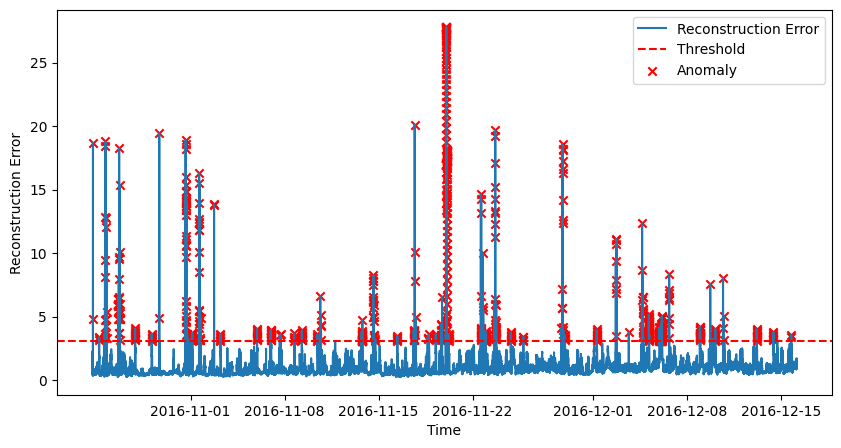

In [39]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(df_test_errors['datetime'], df_test_errors['reconstruction_error'], label='Reconstruction Error')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')

# Mark anomalies
anomalies = df_test_errors[df_test_errors['anomaly'] == 1]
plt.scatter(
    anomalies['datetime'],
    anomalies['reconstruction_error'],
    color='red',
    marker='x',
    label='Anomaly'
)
plt.xlabel("Time")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.show()

In [40]:
# Create "date" column to inspect anomaly detection by day
df_test_errors['date'] = df_test_errors['datetime'].dt.date

# Group by date and count anomalies
anomalies_per_day = df_test_errors.groupby('date')['anomaly'].sum()

# Identify top 5 dates with most anomalies
top_5 = anomalies_per_day.nlargest(5)
print('Top 5 dates with most anomalies:')
print(top_5)

Top 5 dates with most anomalies:
date
2016-11-20    115
2016-12-05    113
2016-12-06     76
2016-11-22     34
2016-10-31     33
Name: anomaly, dtype: int64


In [66]:
energy_features = [
    'House overall [kW]',
    'Total Furnace',
    'Home office [kW]',
    'Fridge [kW]',
    'Wine cellar [kW]',
    'Living room [kW]',
]

# Find absolute error of test values and predictions
#X_test = X_test.drop('datetime', axis = 1)
errors = np.abs(X_test - X_test_pred)

# Create Dataframe with the absolute errors for each feature
df_errors = pd.DataFrame(errors, columns = final_features)

# Only keep energy_features columns
df_errors = df_errors[energy_features]

# Set index to match timestamps
df_errors.index = df_test.index

df_errors


House overall [kW]  Total Furnace  Home office [kW]  Fridge [kW]  \
428332            0.124430       1.739816          0.039342     1.305240   
428333            0.297349       0.261541          0.247531     1.052124   
428334            0.087138       0.325425          0.027520     1.140183   
428335            0.269900       0.259535          0.180268     1.145635   
428336            0.299078       0.260712          0.280340     1.029432   
...                    ...            ...               ...          ...   
503905            0.130799       1.588146          0.755357     1.128614   
503906            0.120373       1.594871          0.747028     1.115273   
503907            0.863360       2.189318          0.859831     0.889276   
503908            1.084855       2.158110          0.761840     0.738413   
503909            1.209393       2.061727          0.633132     0.669071   

        Wine cellar [kW]  Living room [kW]  
428332          0.850131          0.952555  
428333          1.000537          0.480047  
428334          0.799470          0.886875  
428335          0.878772          0.655112  
428336          0.987136          0.519417  
...                  ...               ...  
503905          1.011310          0.355212  
503906          1.007654          0.355450  
503907          1.126259          0.180480  
503908          1.067497          0.172923  
503909          1.050732          0.156942  

[75578 rows x 6 columns]

In [56]:
# Compute per-feature thresholds from training data
train_pred = autoencoder.predict(X_train)
train_errors = np.abs(X_train - train_pred)
df_train_errors = pd.DataFrame(train_errors, columns = final_features)
df_train_errors = df_train_errors[energy_features]
thresholds = {}
for col in energy_features:
  thresholds[col] = np.percentile(df_train_errors[col], 99)

11022/11022 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


In [69]:
# Build dataframe with timestamps to store final results
df_test = pd.DataFrame(index=X_test_raw.index)
df_test['datetime'] = df_work.loc[X_test_raw.index, 'datetime'].values

# Add error columns and anomaly columns
for col in energy_features:
  df_test[f'{col}_error'] = df_errors[col]
  df_test[f'{col}_anomaly'] = (df_test[f'{col}_error'] > thresholds[col]).astype(int)

df_test

datetime  House overall [kW]_error  \
428332 2016-10-24 15:52:00                  0.124430   
428333 2016-10-24 15:53:00                  0.297349   
428334 2016-10-24 15:54:00                  0.087138   
428335 2016-10-24 15:55:00                  0.269900   
428336 2016-10-24 15:56:00                  0.299078   
...                    ...                       ...   
503905 2016-12-16 03:25:00                  0.130799   
503906 2016-12-16 03:26:00                  0.120373   
503907 2016-12-16 03:27:00                  0.863360   
503908 2016-12-16 03:28:00                  1.084855   
503909 2016-12-16 03:29:00                  1.209393   

        House overall [kW]_anomaly  Total Furnace_error  \
428332                           0             1.739816   
428333                           0             0.261541   
428334                           0             0.325425   
428335                           0             0.259535   
428336                           0             0.260712   
...                            ...                  ...   
503905                           0             1.588146   
503906                           0             1.594871   
503907                           0             2.189318   
503908                           0             2.158110   
503909                           0             2.061727   

        Total Furnace_anomaly  Home office [kW]_error  \
428332                      0                0.039342   
428333                      0                0.247531   
428334                      0                0.027520   
428335                      0                0.180268   
428336                      0                0.280340   
...                       ...                     ...   
503905                      0                0.755357   
503906                      0                0.747028   
503907                      0                0.859831   
503908                      0                0.761840   
503909                      0                0.633132   

        Home office [kW]_anomaly  Fridge [kW]_error  Fridge [kW]_anomaly  \
428332                         0           1.305240                    0   
428333                         0           1.052124                    0   
428334                         0           1.140183                    0   
428335                         0           1.145635                    0   
428336                         0           1.029432                    0   
...                          ...                ...                  ...   
503905                         0           1.128614                    0   
503906                         0           1.115273                    0   
503907                         0           0.889276                    0   
503908                         0           0.738413                    0   
503909                         0           0.669071                    0   

        Wine cellar [kW]_error  Wine cellar [kW]_anomaly  \
428332                0.850131                         0   
428333                1.000537                         0   
428334                0.799470                         0   
428335                0.878772                         0   
428336                0.987136                         0   
...                        ...                       ...   
503905                1.011310                         0   
503906                1.007654                         0   
503907                1.126259                         0   
503908                1.067497                         0   
503909                1.050732                         0   

        Living room [kW]_error  Living room [kW]_anomaly  
428332                0.952555                         0  
428333                0.480047                         0  
428334                0.886875                         0  
428335                0.655112                         0  
428336                

In [74]:
# Merge raw data into test dataframe
df_test = pd.merge(
    df_test,
    df_work[energy_features + ['datetime']],
    on = 'datetime',
    how = 'left'
)

df_test.head()

datetime  House overall [kW]_error  House overall [kW]_anomaly  \
0 2016-10-24 15:52:00                  0.124430                           0   
1 2016-10-24 15:53:00                  0.297349                           0   
2 2016-10-24 15:54:00                  0.087138                           0   
3 2016-10-24 15:55:00                  0.269900                           0   
4 2016-10-24 15:56:00                  0.299078                           0   

   Total Furnace_error  Total Furnace_anomaly  Home office [kW]_error  \
0             1.739816                      0                0.039342   
1             0.261541                      0                0.247531   
2             0.325425                      0                0.027520   
3             0.259535                      0                0.180268   
4             0.260712                      0                0.280340   

   Home office [kW]_anomaly  Fridge [kW]_error  Fridge [kW]_anomaly  \
0                         0           1.305240                    0   
1                         0           1.052124                    0   
2                         0           1.140183                    0   
3                         0           1.145635                    0   
4                         0           1.029432                    0   

   Wine cellar [kW]_error  Wine cellar [kW]_anomaly  Living room [kW]_error  \
0                0.850131                         0                0.952555   
1                1.000537                         0                0.480047   
2                0.799470                         0                0.886875   
3                0.878772                         0                0.655112   
4                0.987136                         0                0.519417   

   Living room [kW]_anomaly  House overall [kW]  Total Furnace  \
0                         0            0.843817       0.622083   
1                         0            0.440400       0.222200   
2                         0            0.572617       0.218900   
3                         0            0.442733       0.219933   
4                         0            0.413233       0.219717   

   Home office [kW]  Fridge [kW]  Wine cellar [kW]  Living room [kW]  
0          0.063750     0.004683          0.007783          0.093033  
1          0.066650     0.004967          0.007867          0.093200  
2          0.063017     0.004950          0.007867          0.093350  
3          0.063883     0.005000          0.007850          0.093467  
4          0.060300     0.005000          0.007783          0.094067

In [75]:
# Save dataframe
df_test.to_csv('df_test_2.csv')

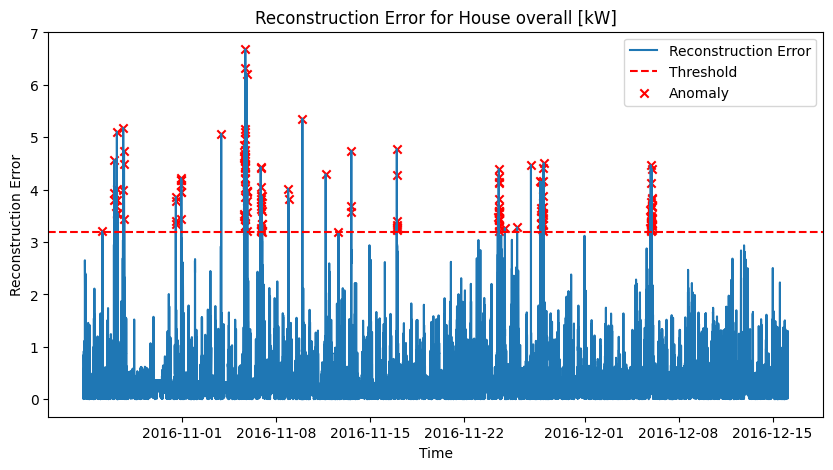

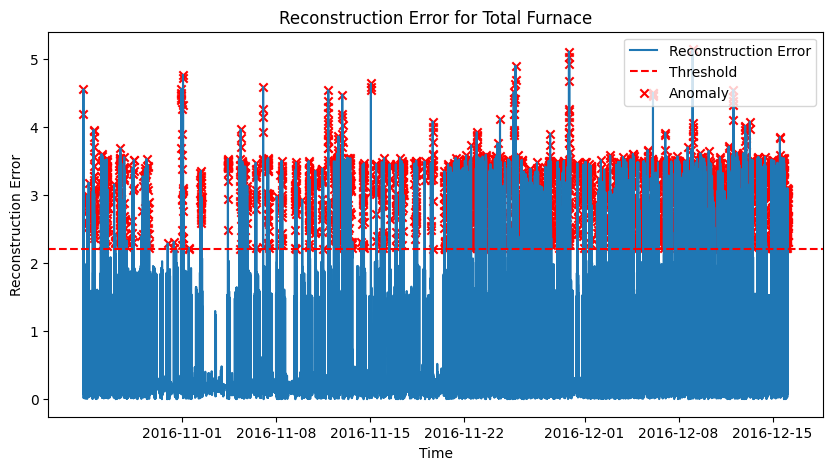

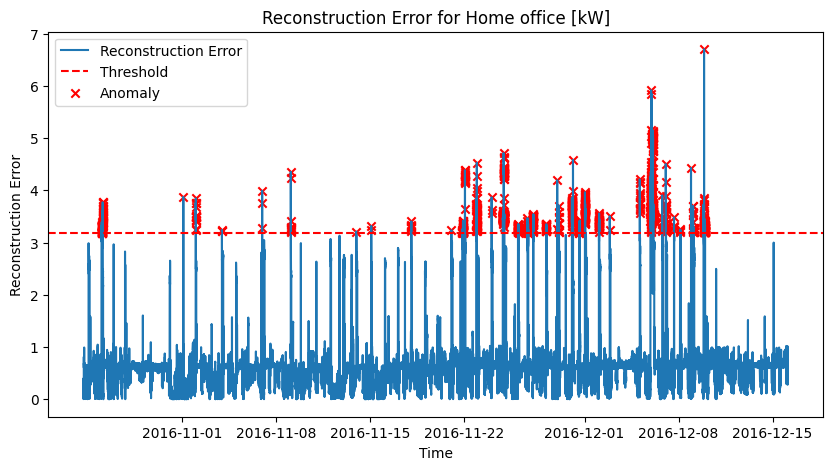

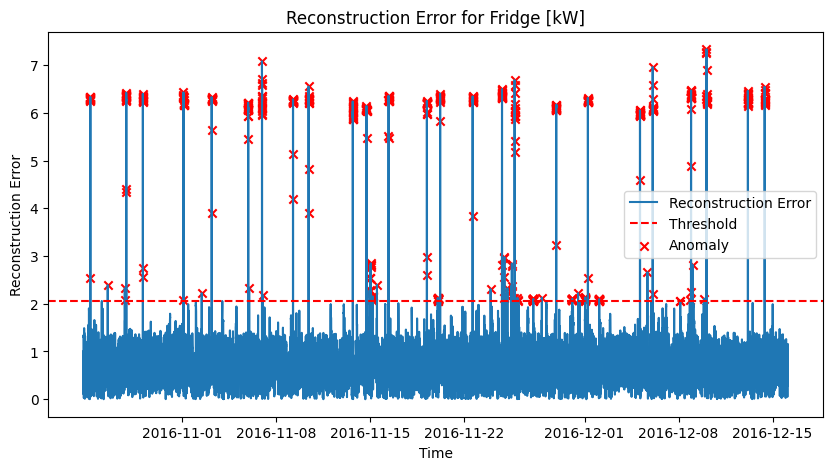

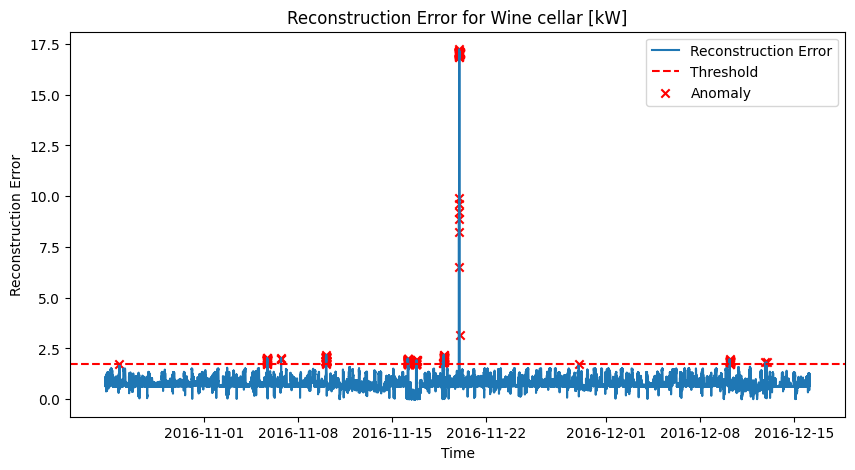

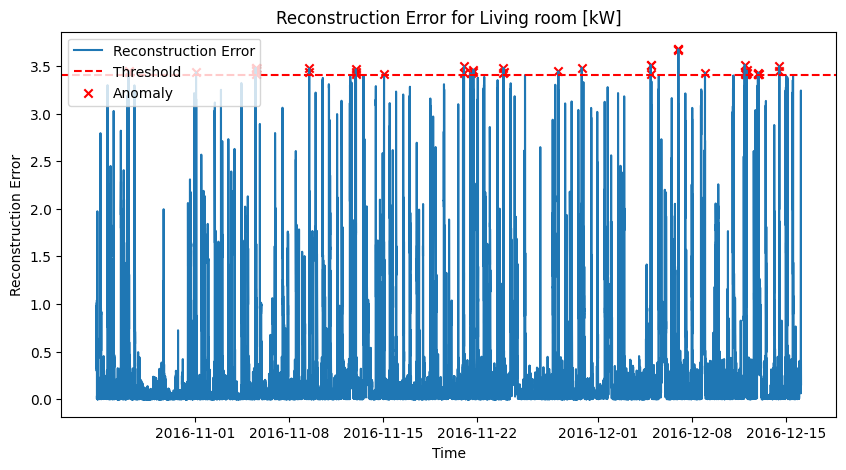

In [76]:
for col in energy_features:
    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(df_test['datetime'], df_test[f'{col}_error'], label='Reconstruction Error')
    plt.axhline(y=thresholds[col], color='red', linestyle='--', label='Threshold')

    # Mark anomalies
    anomalies = df_test[df_test[f'{col}_anomaly'] == 1]
    plt.scatter(
        anomalies['datetime'],
        anomalies[f'{col}_error'],
        color='red',
        marker='x',
        label='Anomaly'
    )

    plt.title(f'Reconstruction Error for {col}')
    plt.xlabel("Time")
    plt.ylabel("Reconstruction Error")
    plt.legend()
    plt.show()

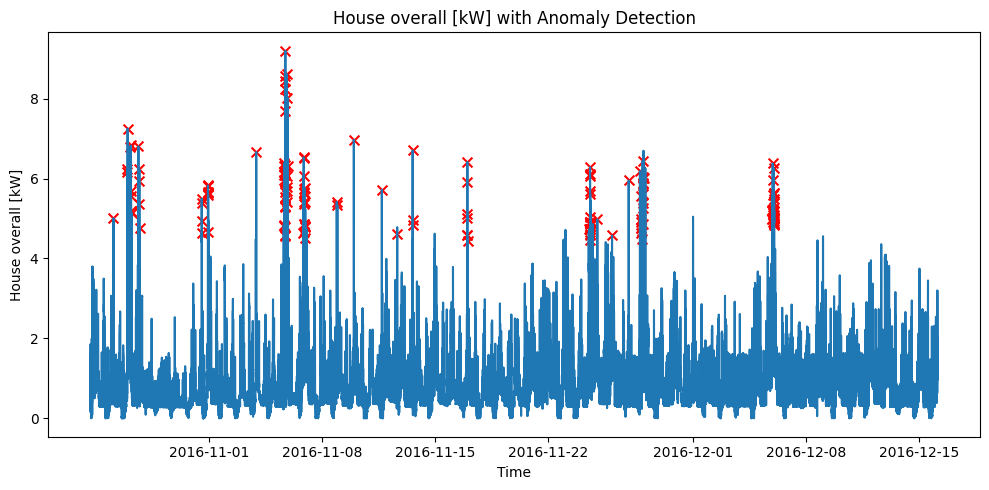

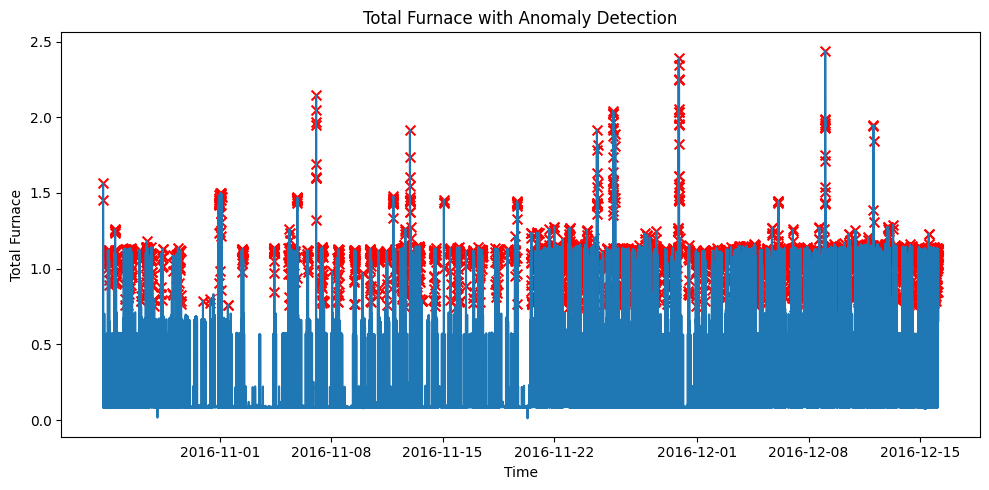

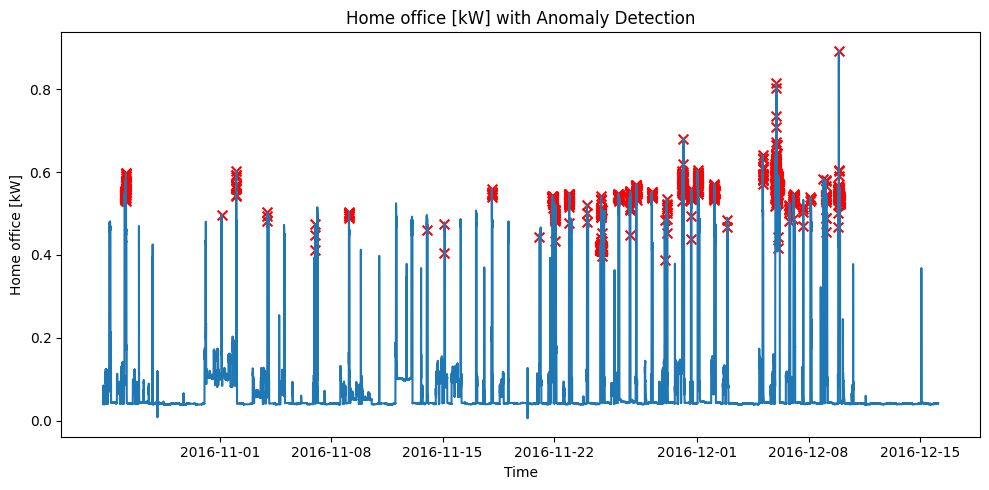

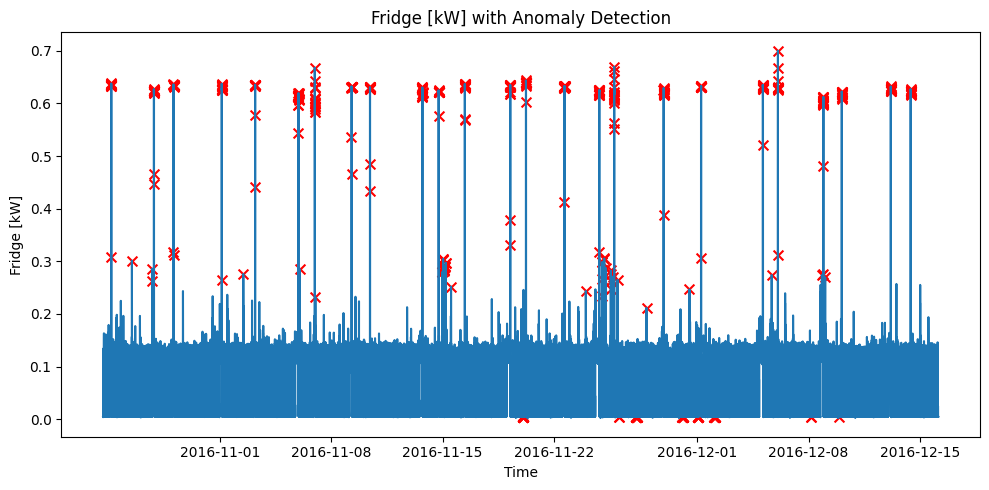

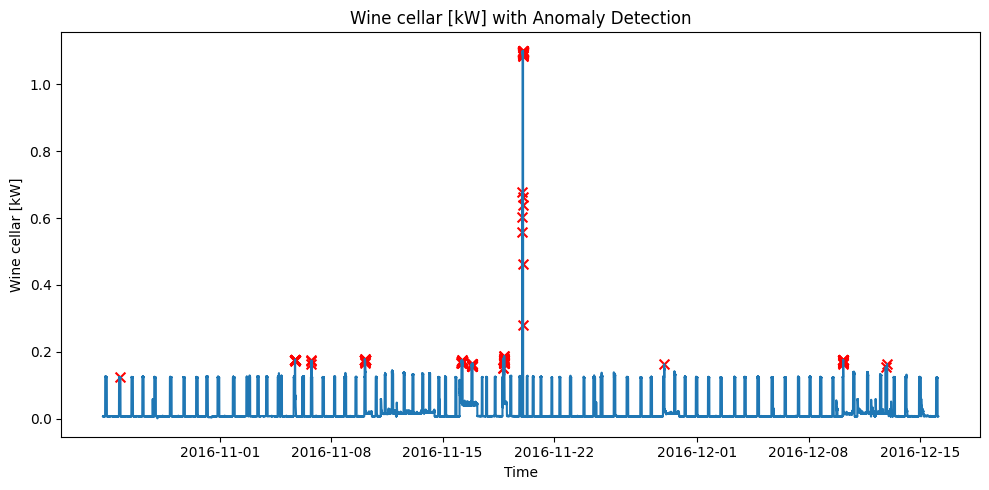

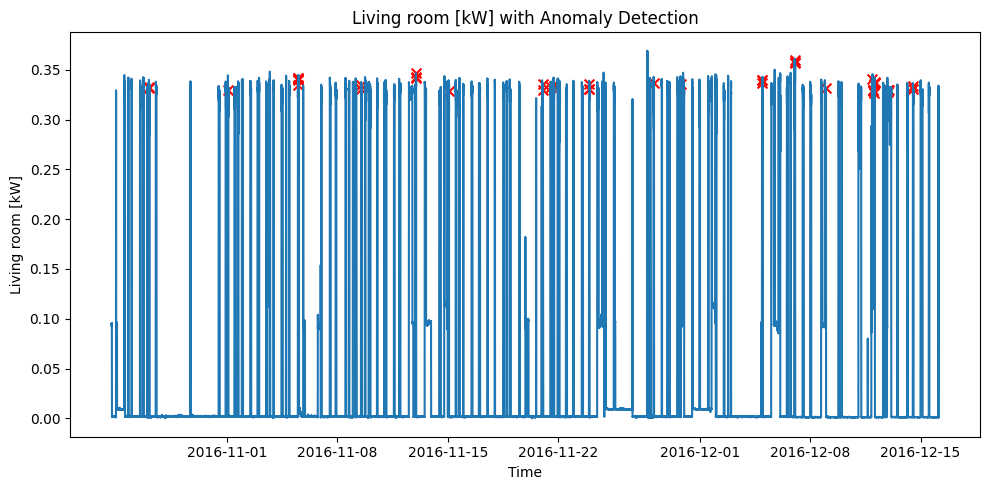

In [77]:
# Create line plots for each feature
for col in energy_features:
  plt.figure(figsize = (10,5))
  plt.plot(df_test['datetime'], df_test[col], label = col)

  # Flag anomalies on the plot
  anomalies = df_test[df_test[f'{col}_anomaly'] == 1]

  # Plot anomalies as red X markers
  plt.scatter(
      anomalies['datetime'],
      anomalies[col],
      color = 'red',
      marker = 'x',
      s = 50,
      label = 'Anomaly'
  )

  plt.title(f'{col} with Anomaly Detection')
  plt.xlabel('Time')
  plt.ylabel(col)
  plt.tight_layout()
  plt.show()


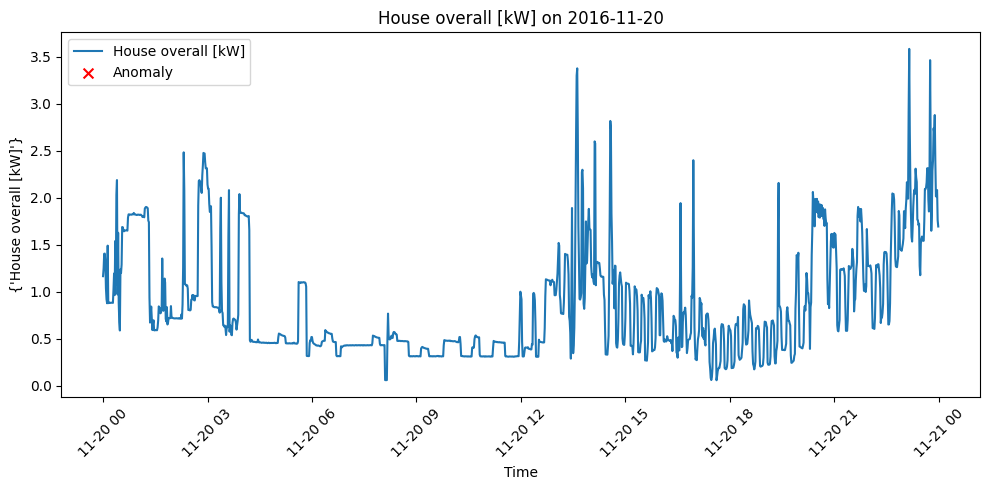

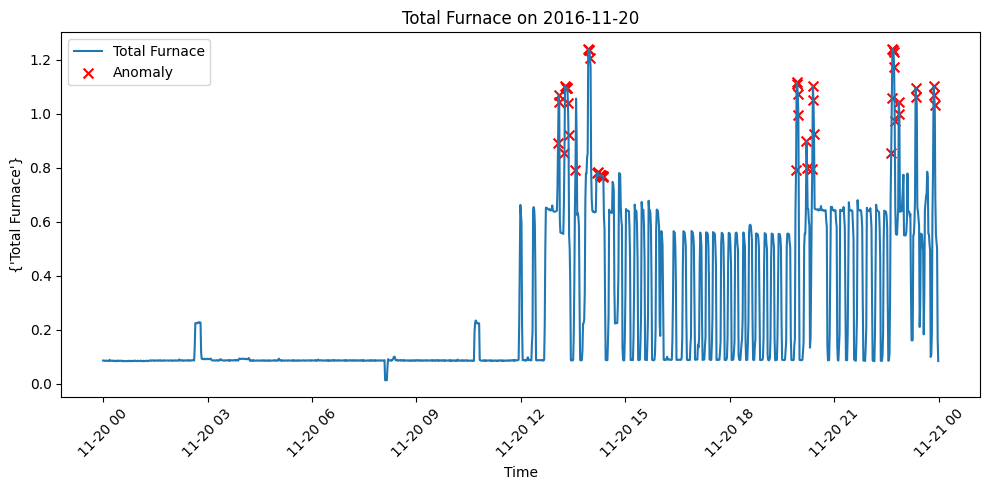

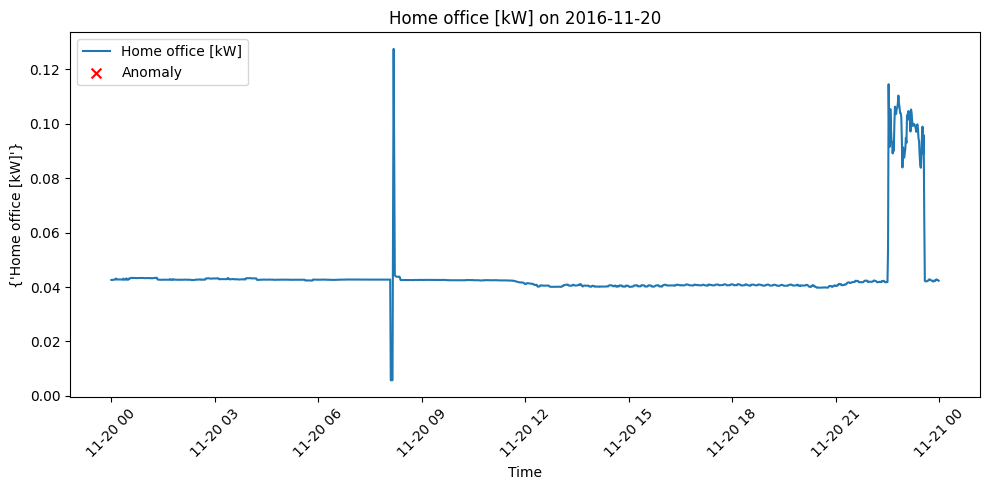

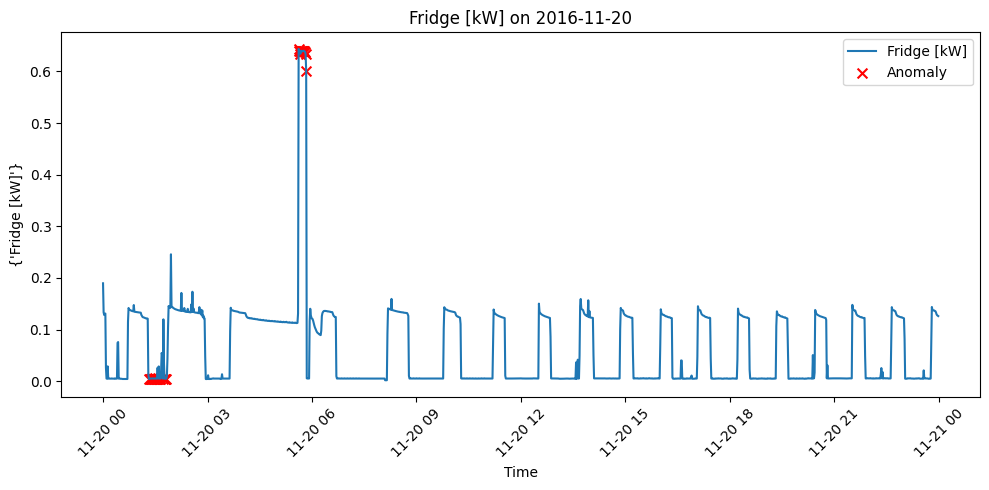

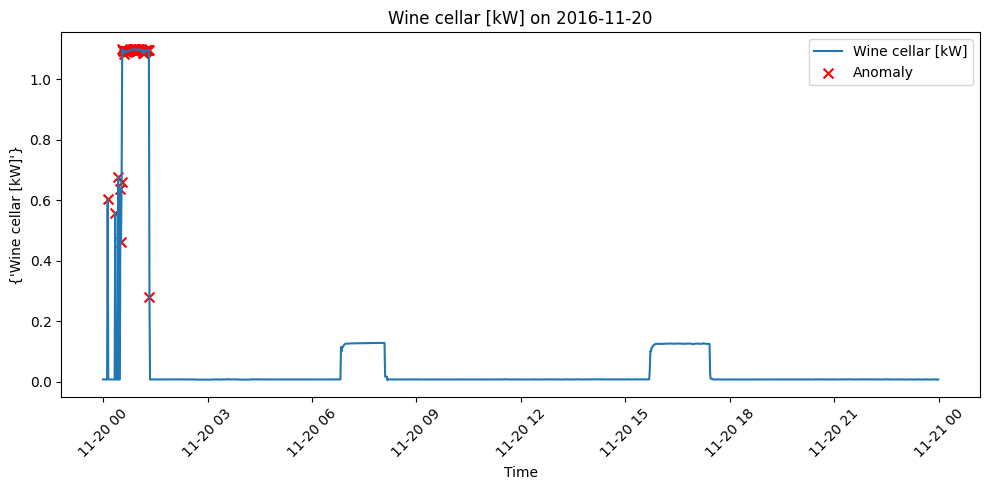

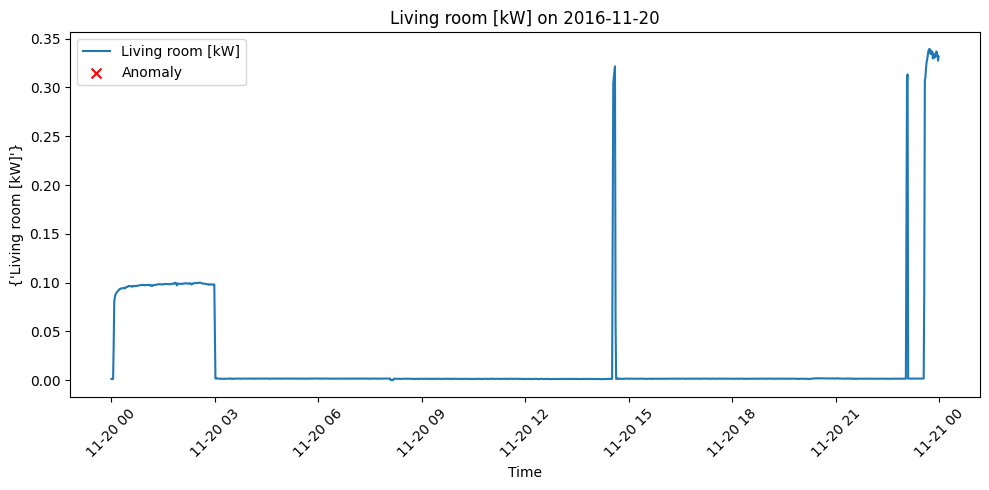

In [79]:
# Boolean mask for date with most anomalies detected: 2016-11-20
date_start = '2016-11-20'
date_end = '2016-11-21'
mask = (
    (df_test['datetime'] >= date_start) &
    (df_test['datetime'] < date_end)
)

# Plot energy consumption data for 2016-11-20
for col in energy_features:
  plt.figure(figsize = (10,5))

  # Plot time series for rows matching target date
  plt.plot(
      df_test.loc[mask, 'datetime'],
      df_test.loc[mask, col],
      label = col
  )

  # Flag anomalies on target date
  anomaly_mask = mask & (df_test[f'{col}_anomaly'] == 1)
  plt.scatter(
      df_test.loc[anomaly_mask, 'datetime'],
      df_test.loc[anomaly_mask, col],
      color = 'red',
      marker = 'x',
      s = 50,
      label = 'Anomaly'
  )

  plt.title(f'{col} on 2016-11-20')
  plt.xlabel('Time')
  plt.ylabel({col})
  plt.xticks(rotation = 45)
  plt.legend()
  plt.tight_layout()
  plt.show()